This is the SECOND experiment trying to apply ML models to local fx (USDCLP). No matters the results:)

# Get and check data

In [85]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [86]:
assets = ['CLP=X', 'HG=F', 'DX=F']
df = yf.download(assets, period='15y', interval='1d')['Close']
df = df.dropna()

[*********************100%%**********************]  3 of 3 completed


In [87]:
print(df.columns, '\n')
df.sample(5)

Index(['CLP=X', 'DX=F', 'HG=F'], dtype='object', name='Ticker') 



Ticker,CLP=X,DX=F,HG=F
Date,,,
2016-07-21,638.330017,97.045998,2.2560
2014-07-09,553.000000,80.042000,3.2365
2015-12-23,696.599976,98.366997,2.1115
2009-08-14,537.520020,79.004997,2.8340
2011-06-14,467.200012,74.692001,4.1540


In [88]:
df.rename(columns={'CLP=X':'usdclp', 'HG=F':'copper', 'DX=F':'dx'}, inplace=True)

In [89]:
df.sample(5)

Ticker,usdclp,dx,copper
Date,,,
2013-04-12,469.100006,82.405998,3.349
2020-02-12,791.299988,98.921997,2.606
2016-03-14,666.429993,96.521004,2.237
2015-09-18,678.349976,94.996002,2.397
2014-06-06,550.799988,80.427002,3.053


# Create features

In [90]:
## usdclp features
# Returns
df['usdclp_chg%1d'] = df['usdclp'].pct_change() *100
df['usdclp_chg%5d'] = df['usdclp'].pct_change(5) *100
df['usdclp_chg%20d'] = df['usdclp'].pct_change(20) *100

# Moving avarage
df['usdclp_ma5'] = df['usdclp'].rolling(window=5).mean()
df['usdclp_ma10'] = df['usdclp'].rolling(window=10).mean()
df['usdclp_ma20'] = df['usdclp'].rolling(window=20).mean()

In [91]:
## copper features
# Returns
df['copper_chg%1d'] = df['copper'].pct_change() *100
df['copper_chg%5d'] = df['copper'].pct_change(5) *100
df['copper_chg%20d'] = df['copper'].pct_change(20) *100

# Moving avarage
df['copper_ma5'] = df['copper'].rolling(window=5).mean()
df['copper_ma10'] = df['copper'].rolling(window=10).mean()
df['copper_ma20'] = df['copper'].rolling(window=20).mean()

In [92]:
## dx features
# Returns
df['dx_chg%1d'] = df['dx'].pct_change() *100
df['dx_chg%5d'] = df['dx'].pct_change(5) *100
df['dx_chg%20d'] = df['dx'].pct_change(20) *100

# Moving avarage
df['dx_ma5'] = df['dx'].rolling(window=5).mean()
df['dx_ma10'] = df['dx'].rolling(window=10).mean()
df['dx_ma20'] = df['dx'].rolling(window=20).mean()

In [93]:
## Create corr columns
# usdclp - copper
df['usdclpCopper_corr5d'] = df['usdclp'].rolling(window=5).corr(df['copper'])
df['usdclpCopper_corr20d'] = df['usdclp'].rolling(window=20).corr(df['copper'])
df['usdclpCopper_corr60d'] = df['usdclp'].rolling(window=60).corr(df['copper'])
df['usdclpCopper_corr120d'] = df['usdclp'].rolling(window=120).corr(df['copper'])

# usdclp - dx
df['usdclpDx_corr5d'] = df['usdclp'].rolling(window=5).corr(df['dx'])
df['usdclpDx_corr20d'] = df['usdclp'].rolling(window=20).corr(df['dx'])
df['usdclpDx_corr60d'] = df['usdclp'].rolling(window=60).corr(df['dx'])
df['usdclpDx_corr120d'] = df['usdclp'].rolling(window=120).corr(df['dx'])

In [94]:
## Create target
df['usdclp+20d'] = df['usdclp'].shift(-20)

In [95]:
df = df.dropna()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3626 entries, 2009-11-06 to 2024-04-22
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   usdclp                 3626 non-null   float64
 1   dx                     3626 non-null   float64
 2   copper                 3626 non-null   float64
 3   usdclp_chg%1d          3626 non-null   float64
 4   usdclp_chg%5d          3626 non-null   float64
 5   usdclp_chg%20d         3626 non-null   float64
 6   usdclp_ma5             3626 non-null   float64
 7   usdclp_ma10            3626 non-null   float64
 8   usdclp_ma20            3626 non-null   float64
 9   copper_chg%1d          3626 non-null   float64
 10  copper_chg%5d          3626 non-null   float64
 11  copper_chg%20d         3626 non-null   float64
 12  copper_ma5             3626 non-null   float64
 13  copper_ma10            3626 non-null   float64
 14  copper_ma20            3626 non-null  

# Exploratory data analysis

In [ ]:
corr  = df.corr()

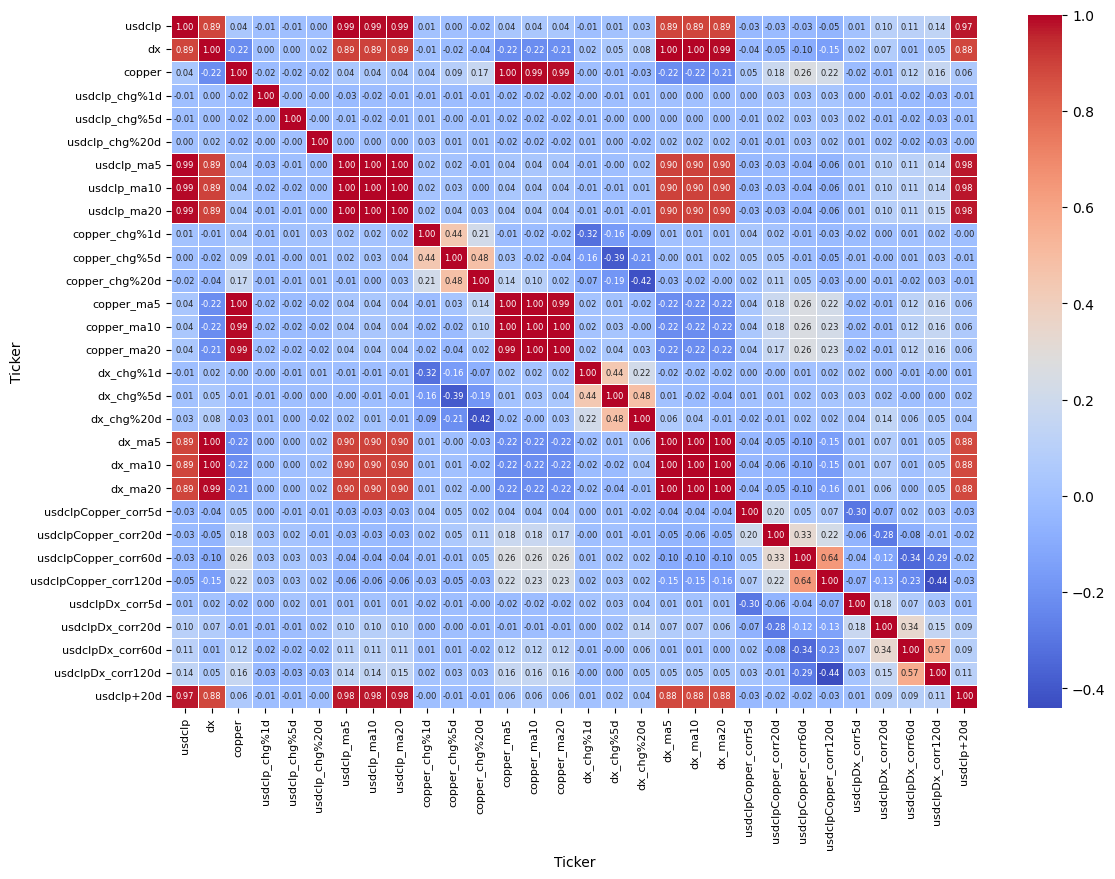

In [97]:
plt.figure(figsize=(13, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5, annot_kws={'size':6})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
usdclp,3626.0,655.528419,139.098473,5.000000,516.512497,654.799988,767.175003,1.050260e+03
dx,3626.0,91.452048,9.201395,73.107002,81.585249,93.805000,97.819000,1.140470e+02
copper,3626.0,3.268316,0.662961,1.939500,2.736000,3.213750,3.758500,4.929000e+00
usdclp_chg%1d,3626.0,6.323113,273.364514,-99.246727,-0.463669,0.000000,0.489069,1.317500e+04
usdclp_chg%5d,3626.0,6.410531,273.018805,-99.240468,-1.036930,0.048341,1.226618,1.299300e+04
usdclp_chg%20d,3626.0,3.821475,209.900144,-99.261338,-1.730664,0.217975,2.494752,1.263720e+04
usdclp_ma5,3626.0,655.280220,138.240810,438.622005,514.555495,655.820001,766.344989,1.034362e+03
usdclp_ma10,3626.0,654.973836,137.862171,452.105002,513.146751,655.485001,765.952765,1.007865e+03
usdclp_ma20,3626.0,654.388229,137.243970,456.196001,513.556249,655.605753,766.159354,9.700831e+02


In [99]:
# Delete features with inf values
df.drop(columns=['usdclpCopper_corr5d', 'usdclpDx_corr5d'], axis=1, inplace=True)

In [100]:
## Feature selections
# Only variables highly correlated with the features (+ target)
target = 'usdclp+20d'
threshold = 0.8

# corr with target
corr_target = corr[target]

# filter
high_corr_features = corr_target[abs(corr_target) > threshold].index.tolist()

In [102]:
# features that enter to the model
print(high_corr_features)
df = df[high_corr_features]

['usdclp', 'dx', 'usdclp_ma5', 'usdclp_ma10', 'usdclp_ma20', 'dx_ma5', 'dx_ma10', 'dx_ma20', 'usdclp+20d']


# Apply regression models

In [104]:
# Create year column to the split data
df['year'] = df.index.year

In [105]:
df

Ticker,usdclp,dx,usdclp_ma5,usdclp_ma10,usdclp_ma20,dx_ma5,dx_ma10,dx_ma20,usdclp+20d,year
Date,,,,,,,,,,
2009-11-06,513.770020,75.940002,516.678003,520.897998,529.251498,76.131999,76.225999,75.95275,493.100006,2009
2009-11-09,508.149994,75.135002,514.374005,518.753000,527.453999,75.867000,76.120000,75.89500,496.519989,2009
2009-11-10,503.179993,75.110001,511.446002,516.357999,525.389000,75.575000,76.003000,75.84225,495.130005,2009
2009-11-11,499.779999,75.260002,508.356006,513.739001,523.117499,75.462001,75.870500,75.81900,489.779999,2009
2009-11-12,502.440002,75.695000,505.464001,512.184003,521.155499,75.428001,75.833500,75.82075,488.089996,2009
...,...,...,...,...,...,...,...,...,...,...
2024-04-16,972.299988,106.065002,955.973999,951.114355,961.084003,105.598001,104.777300,104.38650,923.409973,2024
2024-04-17,979.960022,105.764000,963.747998,951.553357,962.761505,105.744601,104.954000,104.50050,914.080017,2024
2024-04-18,978.429993,105.982002,969.935999,953.957355,963.389505,105.928201,105.163100,104.64730,904.789978,2024


In [106]:
print(df['year'].unique(), '\n')
print(len(df['year'].unique()))

[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022
 2023 2024] 

16


In [107]:
## Split data
train = df[df['year'] <= 2019]
test = df[df['year'] >= 2020]

y_train = train['usdclp+20d']
X_train = train.drop(['usdclp+20d', 'year'], axis=1)

y_test = test['usdclp+20d']
X_test = test.drop(['usdclp+20d', 'year'], axis=1)

In [108]:
print('Shape X and y train:')
print(X_train.shape, y_train.shape)
print('')
print('Shape X and y test:')
print(X_test.shape, y_test.shape)
print('')
print('Proportion test/train:')
print(round(len(y_test)/len(y_train), 3))

Shape X and y train:
(2542, 8) (2542,)

Shape X and y test:
(1084, 8) (1084,)

Proportion test/train:
0.426


In [109]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor

In [110]:
# Scaler X data
scaler = MinMaxScaler()
Xsc_train = scaler.fit_transform(X_train)
Xsc_test = scaler.transform(X_test)

In [111]:
Xsc_train

array([[0.59665086, 0.09386701, 0.20284218, ..., 0.09759803, 0.08756852,
        0.05860771],
       [0.59006007, 0.06719459, 0.19685484, ..., 0.0887255 , 0.08395998,
        0.05656375],
       [0.58423159, 0.0663662 , 0.18924591, ..., 0.07894896, 0.07997697,
        0.05469676],
       ...,
       [0.86958074, 0.77661428, 0.81483533, ..., 0.79910534, 0.79563359,
        0.81414634],
       [0.87180896, 0.77200873, 0.81202878, ..., 0.79329965, 0.79303272,
        0.81096978],
       [0.85281069, 0.7604452 , 0.79945118, ..., 0.78541813, 0.78994503,
        0.80790295]])

In [112]:
xgbReg = XGBRegressor()

xgbReg.fit(Xsc_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [113]:
y_xgbReg = xgbReg.predict(Xsc_test)

# Analyze results

In [114]:
mse = mean_squared_error(y_test, y_xgbReg)
print('Error cuadrático medio:', mse)

Error cuadrático medio: 21493.287964713112


In [115]:
from math import sqrt
rmse = sqrt(mse)
print('Raíz del error cuadrático medio:', rmse)

Raíz del error cuadrático medio: 146.60589334918672


In [116]:
r2 = r2_score(y_test, y_xgbReg)
print('Coeficiente de determinación (R^2):', r2)

Coeficiente de determinación (R^2): -3.115870359830698


In [117]:
# Crear un DataFrame con las predicciones y los valores reales (y_test), manteniendo el índice de fechas
results_xgbReg = pd.DataFrame({'y_test':y_test, 'predictions':y_xgbReg}, index=y_test.index)
usdclp = df['usdclp']

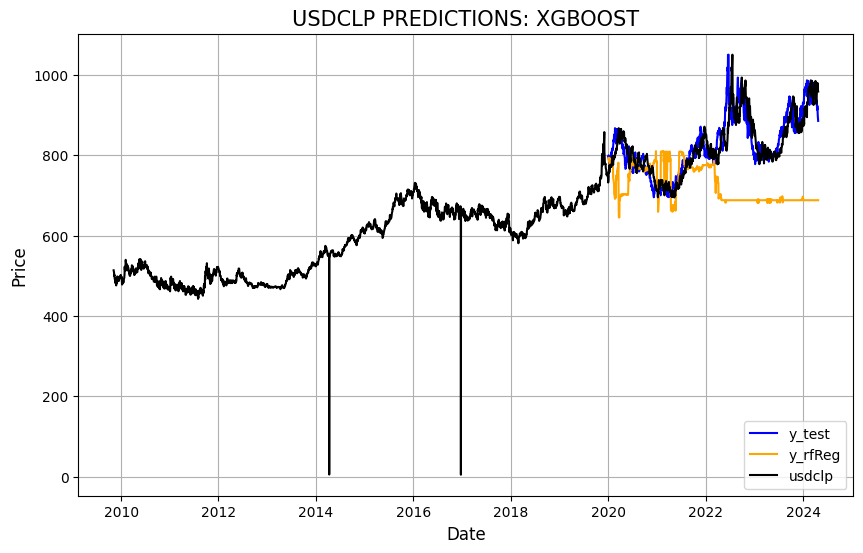

In [118]:
plt.figure(figsize=(10, 6))
plt.title('USDCLP PREDICTIONS: XGBOOST', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.plot(results_xgbReg.index, results_xgbReg['y_test'], label='y_test', color='blue')
plt.plot(results_xgbReg.index, results_xgbReg['predictions'], label='y_rfReg', color='orange')
plt.plot(usdclp.index, usdclp, label='usdclp', color='black')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Final comments:
- I will take a break to rethink my life, I'm stuck.
- Balance for all and blessings.
- God is perfect.